## 로지스틱 회귀분석

- #### 대출을 해줄 수 있는지 여부 판단
    - target : Personal Loan
    
    - 데이터셋 : https://www.kaggle.com/iconoclash/personal-loan-dataset-binary-classification

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [4]:
ploan = pd.read_csv("/content/drive/MyDrive/2023데청캠/머신러닝_회귀/Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [6]:
# 의미없는 변수 제거
ploan_processed = ploan.drop(['ID', 'ZIP Code'], axis=1, inplace=False)

In [7]:
ploan_processed.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


- #### 데이터 분리

In [9]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=102)

- #### 로지스틱회귀모형 모델링

In [11]:
model = sm.Logit(y_train, x_train)
results = model.fit(mothod='newton')

Optimization terminated successfully.
         Current function value: 0.129622
         Iterations 9


/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: mothod. After release 0.14, this will raise.
  warnings.warn(


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.6088
Time:                        10:36:59   Log-Likelihood:                -226.84
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                2.891e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0601      0.095      0.630      0.529      -0.127       0.247
CCAvg                  0.1412      0.064      2.196      0.028       0.015       0.267
CD Account             3.8711      0.567      6.827      0.000       2.760       4.982
CreditCard            -1.5362      0.358     -4.293      0.000      -2.238      -0.835
Education              1.8225      0.199      9.143      0.000       1.432       2.213
Experience            -0.0426      0.095     -0.448      0.654      -0.229       0.144
Family                 0.5957      0.123      4.859      0.000       0.355       0.836
Income                 0.0540      0.004     12.292      0.000       0.045       0.063
Mortgage              -0.0003      0.001     -0.343      0.732      -0.002       0.002
Online                -0.5070      0.262     -1.939      0.053      -1.020       0.006
Securities Account    -1.3259      0.524     -2.532      0.011      -2.352      -0.300
const                -14.9293      2.640     -5.656      0.000     -20.103      -9.755
======================================================================================
"""

In [14]:
results.params

Age                    0.060094
CCAvg                  0.141168
CD Account             3.871068
CreditCard            -1.536217
Education              1.822529
Experience            -0.042629
Family                 0.595657
Income                 0.054049
Mortgage              -0.000330
Online                -0.507031
Securities Account    -1.325944
const                -14.929306
dtype: float64

In [15]:
np.exp(results.params)

Age                   1.061936e+00
CCAvg                 1.151619e+00
CD Account            4.799360e+01
CreditCard            2.151937e-01
Education             6.187488e+00
Experience            9.582666e-01
Family                1.814222e+00
Income                1.055537e+00
Mortgage              9.996706e-01
Online                6.022809e-01
Securities Account    2.655522e-01
const                 3.283105e-07
dtype: float64

In [16]:
results.aic

477.6763428710175

In [17]:
y_pred = results.predict(x_test)
y_pred

924     0.009612
2357    0.005326
455     0.014446
387     0.044246
343     0.003249
          ...   
2124    0.000805
2100    0.029638
893     0.000271
1669    0.000125
2218    0.000396
Length: 750, dtype: float64

In [19]:
def PRED(y, threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return (Y.astype(int))
Y_pred = PRED(y_pred, 0.5)
Y_pred

924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int64

In [20]:
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[663  11]
 [ 29  47]]


In [22]:
(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)

0.9466666666666667

In [23]:
def acc(cfmat):
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return acc

In [24]:
acc(cfmat)

0.9466666666666667

- #### 임계값에 따른 성능지표 비교

In [25]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])

for i in threshold:
    Y_pred = PRED(y_pred,i)
    cfmat = confusion_matrix(y_test, Y_pred)
    table.loc[i] = acc(cfmat)

table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.101333
0.1,0.861333
0.2,0.901333
0.3,0.920000
0.4,0.938667
0.5,0.946667
0.6,0.949333
0.7,0.952000
0.8,0.952000


AUC: 0.9393838825550523


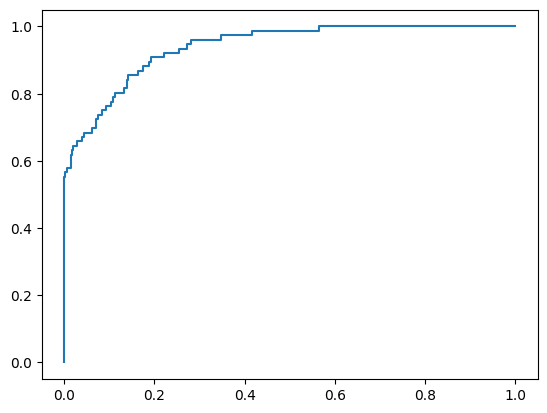

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC:', auc)

- #### Experience, Mortgage 변수 제거

In [27]:
feature_columns2 = list(ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage']))
X2 = ploan_processed[feature_columns2]
y2 = ploan_processed['Personal Loan']

In [28]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.7, test_size=0.3, random_state=102)

In [30]:
model2 = sm.Logit(y2_train, x2_train)
results2 = model2.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.129712
         Iterations 9


In [31]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.6085
Time:                        10:50:42   Log-Likelihood:                -227.00
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                4.297e-146
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.529      0.126      -0.005       0.040
CCAvg                  0.1451      0.064      2.275      0.023       0.020       0.270
CD Account             3.8552      0.565      6.827      0.000       2.748       4.962
CreditCard            -1.5299      0.356     -4.295      0.000      -2.228      -0.832
Education              1.8383      0.197      9.324      0.000       1.452       2.225
Family                 0.5945      0.122      4.872      0.000       0.355       0.834
Income                 0.0537      0.004     12.434      0.000       0.045       0.062
Online                -0.5071      0.262     -1.938      0.053      -1.020       0.006
Securities Account    -1.3225      0.523     -2.529      0.011      -2.348      -0.297
const                -13.8673      1.174    -11.810      0.000     -16.169     -11.566
======================================================================================
"""

In [32]:
y2_pred = results2.predict(x2_test)
y2_pred

924     0.009884
2357    0.005370
455     0.013954
387     0.042374
343     0.002814
          ...   
2124    0.000789
2100    0.029202
893     0.000260
1669    0.000128
2218    0.000404
Length: 750, dtype: float64

In [33]:
Y2_pred = PRED(y2_pred, 0.5)
Y2_pred

924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int64

In [34]:
cfmat2 = confusion_matrix(y_test, Y_pred)

In [35]:
acc(cfmat2)

0.944

### 회귀계수 축소법

In [37]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [38]:
ploan = pd.read_csv('/content/drive/MyDrive/2023데청캠/머신러닝_회귀/Personal Loan.csv')
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

In [39]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [40]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=102)


- #### Lasso

In [42]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [43]:
lasso.coef_

array([ 4.89681547e-04,  8.00850400e-03,  6.59810232e-02, -0.00000000e+00,
        7.48241892e-02,  8.81624384e-05,  2.64904770e-02,  3.49537610e-03,
        2.59297464e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [48]:
pred_y_lasso = lasso.predict(x_test)
pred_Y_lasso = PRED(pred_y_lasso, 0.5)

In [49]:
cfmat = confusion_matrix(y_test, pred_Y_lasso)
print(acc(cfmat))

0.932


AUC: 0.942468374199594


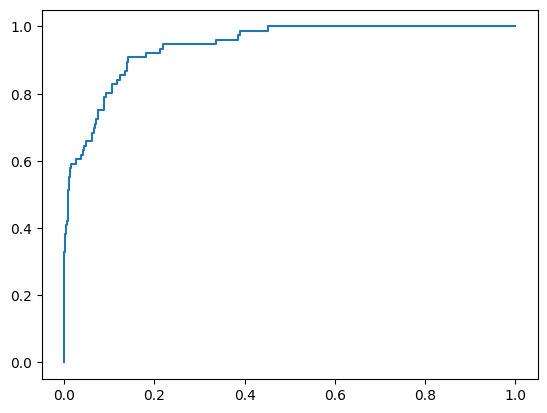

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_lasso)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC:', auc)

- #### Ridge

In [51]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [52]:
ridge.coef_

array([-2.33494223e-03,  1.19876825e-02,  3.32565910e-01, -6.22822445e-02,
        8.65336770e-02,  2.89763096e-03,  3.22076910e-02,  3.21925053e-03,
       -7.66125755e-07, -2.51119894e-02, -7.22860187e-02,  0.00000000e+00])

In [53]:
pred_y_ridge = ridge.predict(x_test)
pred_Y_ridge = PRED(pred_y_ridge, 0.5)

In [54]:
cfmat = confusion_matrix(y_test, pred_Y_ridge)
print(acc(cfmat))

0.9453333333333334


AUC: 0.9502967359050445


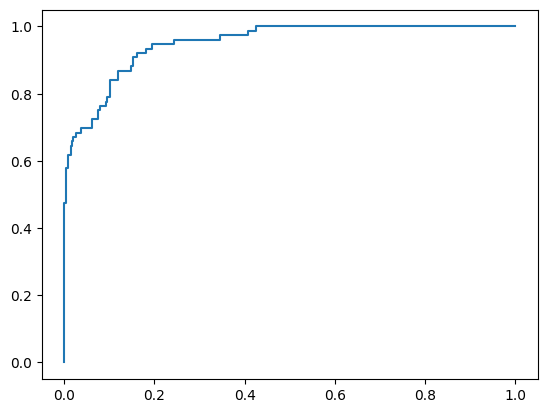

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_ridge)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC:', auc)

- #### ElasticNet

In [57]:
elastic = ElasticNet(alpha = 0.01, l1_ratio=0.5)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [58]:
elastic.coef_

array([ 2.32835292e-06,  1.03355555e-02,  1.55787081e-01, -1.56235823e-02,
        8.04449114e-02,  5.68583055e-04,  2.94119771e-02,  3.39182663e-03,
        1.58356349e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [59]:
pred_y_elastic = elastic.predict(x_test)
pred_Y_elastic = PRED(pred_y_ridge, 0.5)

In [60]:
cfmat = confusion_matrix(y_test, pred_Y_elastic)
print(acc(cfmat))

0.9453333333333334


AUC: 0.9491058878650632


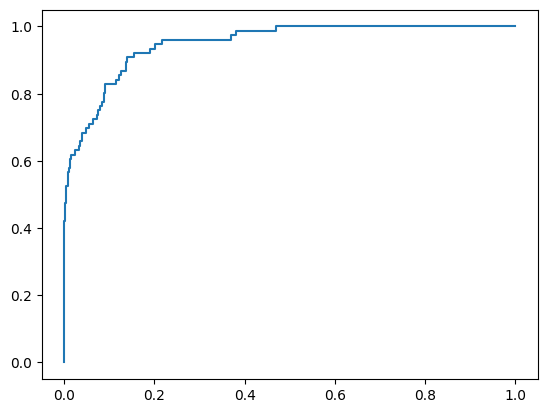

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_elastic)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC:', auc)

- alpha 값에 따른 정확도 변화